# GFPGAN Inference Demo
### (No colorization; No CUDA extensions required)

[![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2101.04061)
[![GitHub Stars](https://img.shields.io/github/stars/TencentARC/GFPGAN?style=social)](https://github.com/TencentARC/GFPGAN)
[![download](https://img.shields.io/github/downloads/TencentARC/GFPGAN/total.svg)](https://github.com/TencentARC/GFPGAN/releases)

## GFPGAN - Towards Real-World Blind Face Restoration with Generative Facial Prior

GFPGAN is a blind face restoration algorithm towards real-world face images. <br>
It leverages the generative face prior in a pre-trained GAN (*e.g.*, StyleGAN2) to restore realistic faces while precerving fidelity. <br>

If you want to use the paper model, please go to this [Colab Demo](https://colab.research.google.com/drive/1Oa1WwKB4M4l1GmR7CtswDVgOCOeSLChA?usp=sharing) for GFPGAN <a href="https://colab.research.google.com/drive/1Oa1WwKB4M4l1GmR7CtswDVgOCOeSLChA?usp=sharing"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="google colab logo"></a>.

**Limitations**: GFPGAN could not handle all the low-quality faces in the real world. Therefore, it may fail on your own cases.

###Enjoy! :-)

<img src="https://xinntao.github.io/projects/GFPGAN_src/gfpgan_teaser.jpg" width="800">


# 1. Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU

in the **Runtime** menu -> **Change runtime type**

Then, we clone the repository, set up the envrironment, and download the pre-trained model.


In [47]:
# Clone GFPGAN and enter the GFPGAN folder
%cd /content
!rm -rf GFPGAN
!git clone https://github.com/TencentARC/GFPGAN.git
%cd GFPGAN

# Set up the environment
# Install basicsr - https://github.com/xinntao/BasicSR
# We use BasicSR for both training and inference
!pip install basicsr
# Install facexlib - https://github.com/xinntao/facexlib
# We use face detection and face restoration helper in the facexlib package
!pip install facexlib
# Install other depencencies
!pip install -r requirements.txt
!python setup.py develop
!pip install realesrgan  # used for enhancing the background (non-face) regions
# Download the pre-trained model
# !wget https://github.com/TencentARC/GFPGAN/releases/download/v0.2.0/GFPGANCleanv1-NoCE-C2.pth -P experiments/pretrained_models
# Now we use the V1.3 model for the demo
!wget https://github.com/TencentARC/GFPGAN/releases/download/v1.3.0/GFPGANv1.3.pth -P experiments/pretrained_models


/content
Cloning into 'GFPGAN'...
remote: Enumerating objects: 527, done.
remote: Counting objects: 100% (213/213), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 527 (delta 170), reused 155 (delta 154), pack-reused 314
Receiving objects: 100% (527/527), 5.38 MiB | 33.98 MiB/s, done.
Resolving deltas: 100% (281/281), done.
/content/GFPGAN
/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:85: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
running develop
/usr/local/lib/python3.10/dist-packages/setuptools/command/develop.py:42: EasyInstallDeprecationWarning: eas

# 2. Upload Images / Use the demo images

In [48]:
# upload your own images
import os
from google.colab import files
import shutil

upload_folder = 'inputs/upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.mkdir(upload_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving abbas01.jpeg to abbas01.jpeg
Saving abbas02.jpeg to abbas02.jpeg
Saving bilal01.jpeg to bilal01.jpeg
Saving bilal02.jpeg to bilal02.jpeg
Saving cam01.jpeg to cam01.jpeg
Saving cam02.jpeg to cam02.jpeg
Saving cam03.jpeg to cam03.jpeg
Saving cam04.jpeg to cam04.jpeg
Saving cam05.jpeg to cam05.jpeg
Saving cam06.jpeg to cam06.jpeg
Saving siraj01.jpeg to siraj01.jpeg
Saving siraj02.jpeg to siraj02.jpeg
move abbas01.jpeg to inputs/upload/abbas01.jpeg
move abbas02.jpeg to inputs/upload/abbas02.jpeg
move bilal01.jpeg to inputs/upload/bilal01.jpeg
move bilal02.jpeg to inputs/upload/bilal02.jpeg
move cam01.jpeg to inputs/upload/cam01.jpeg
move cam02.jpeg to inputs/upload/cam02.jpeg
move cam03.jpeg to inputs/upload/cam03.jpeg
move cam04.jpeg to inputs/upload/cam04.jpeg
move cam05.jpeg to inputs/upload/cam05.jpeg
move cam06.jpeg to inputs/upload/cam06.jpeg
move siraj01.jpeg to inputs/upload/siraj01.jpeg
move siraj02.jpeg to inputs/upload/siraj02.jpeg


### OR you can use the demo image by running the following codes

In [49]:
import shutil
import os
upload_folder = 'inputs/upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.makedirs(upload_folder, exist_ok=True)
shutil.copy("/abbas02.jpeg", upload_folder)
shutil.copy("/cam03.jpeg", upload_folder)
shutil.copy("/cam04.jpeg", upload_folder)


'inputs/upload/cam04.jpeg'

## 3. Inference

In [50]:
# Now we use the GFPGAN to restore the above low-quality images
# We use [Real-ESRGAN](https://github.com/xinntao/Real-ESRGAN) for enhancing the background (non-face) regions
# You can find the different models in https://github.com/TencentARC/GFPGAN#european_castle-model-zoo
!rm -rf results
!python inference_gfpgan.py -i inputs/upload -o results -v 1.3 -s 2 --bg_upsampler realesrgan

# Usage: python inference_gfpgan.py -i inputs/whole_imgs -o results -v 1.3 -s 2 [options]...
#
#  -h                   show this help
#  -i input             Input image or folder. Default: inputs/whole_imgs
#  -o output            Output folder. Default: results
#  -v version           GFPGAN model version. Option: 1 | 1.2 | 1.3. Default: 1.3
#  -s upscale           The final upsampling scale of the image. Default: 2
#  -bg_upsampler        background upsampler. Default: realesrgan
#  -bg_tile             Tile size for background sampler, 0 for no tile during testing. Default: 400
#  -suffix              Suffix of the restored faces
#  -only_center_face    Only restore the center face
#  -aligned             Input are aligned faces
#  -ext                 Image extension. Options: auto | jpg | png, auto means using the same extension as inputs. Default: auto

!ls results/cmp

Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.1.0/detection_Resnet50_Final.pth" to /content/GFPGAN/gfpgan/weights/detection_Resnet50_Final.pth

100% 104M/104M [00:00<00:00, 280MB/s] 
Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.2.2/parsing_parsenet.pth" to /content/GFPGAN/gfpgan/weights/parsing_parsenet.pth

100% 81.4M/81.4M [00:00<00:00, 186MB/s]
Processing abbas02.jpeg ...
	Tile 1/8
	Tile 2/8
	Tile 3/8
	Tile 4/8
	Tile 5/8
	Tile 6/8
	Tile 7/8
	Tile 8/8
Processing cam03.jpeg ...
	Tile 1/12
	Tile 2/12
	Tile 3/12
	Tile 4/12
	Tile 5/12
	Tile 6/12
	Tile 7/12
	Tile 8/12
	Tile 9/12
	Tile 10/12
	Tile 11/12
	Tile 12/12
Processing cam04.jpeg ...
	Tile 1/8
	Tile 2/8
	Tile 3/8
	Tile 4/8
	Tile 5/8
	Tile 6/8
	Tile 7/8
	Tile 8/8
Results are in the [results] folder.
abbas02_00.png	cam03_00.png  cam04_00.png


## 4. Visualize

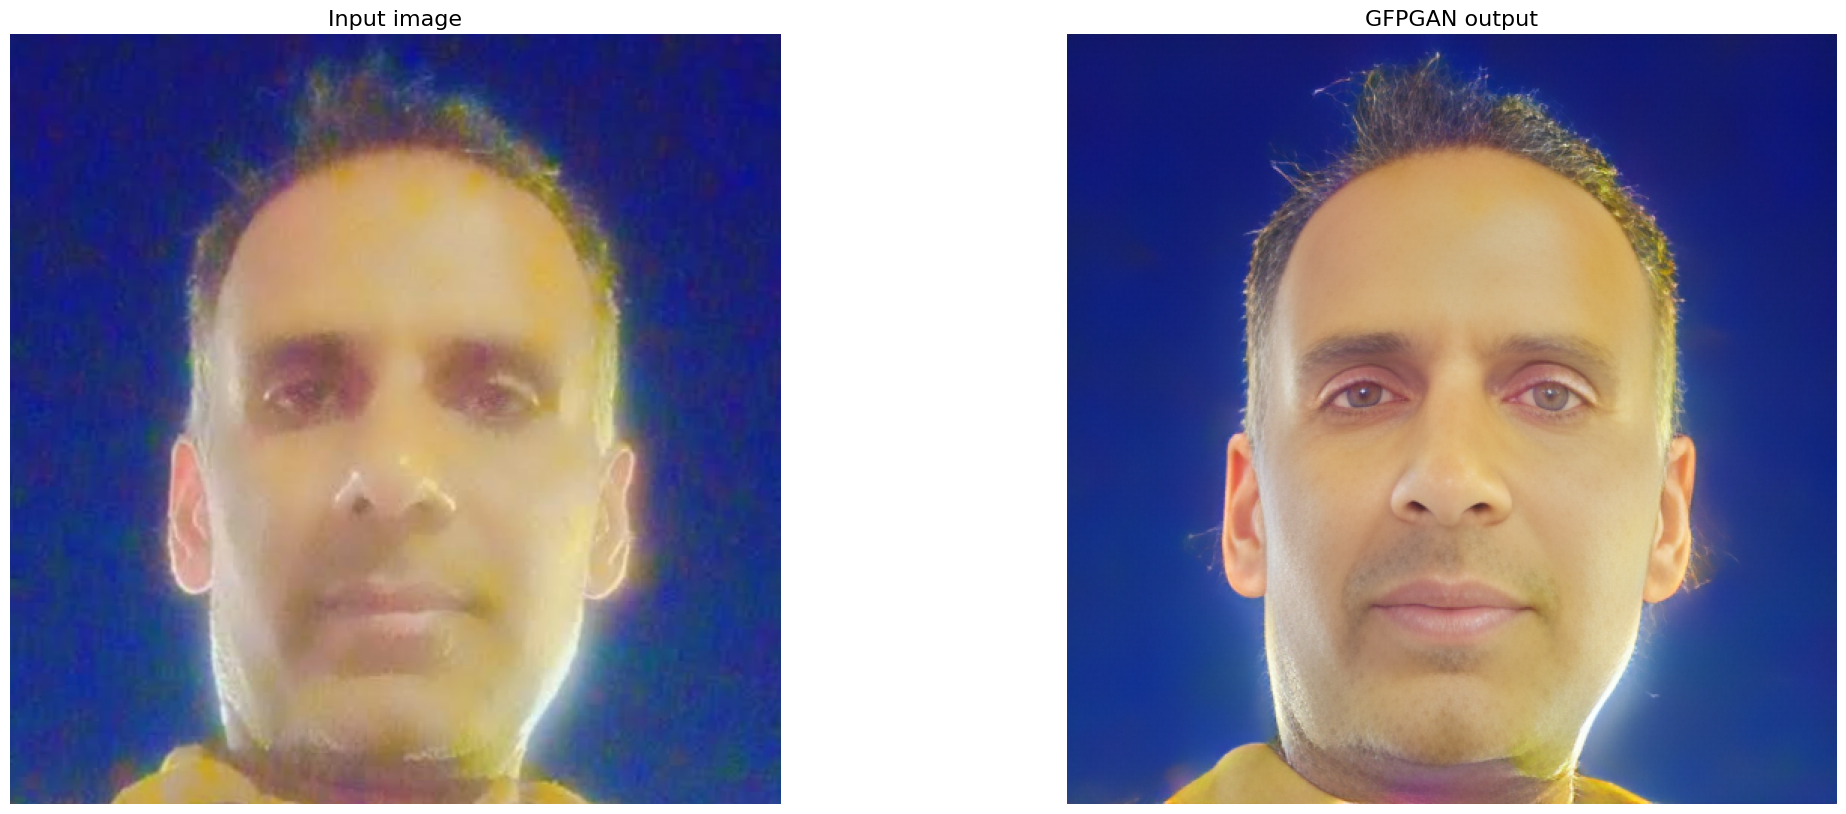

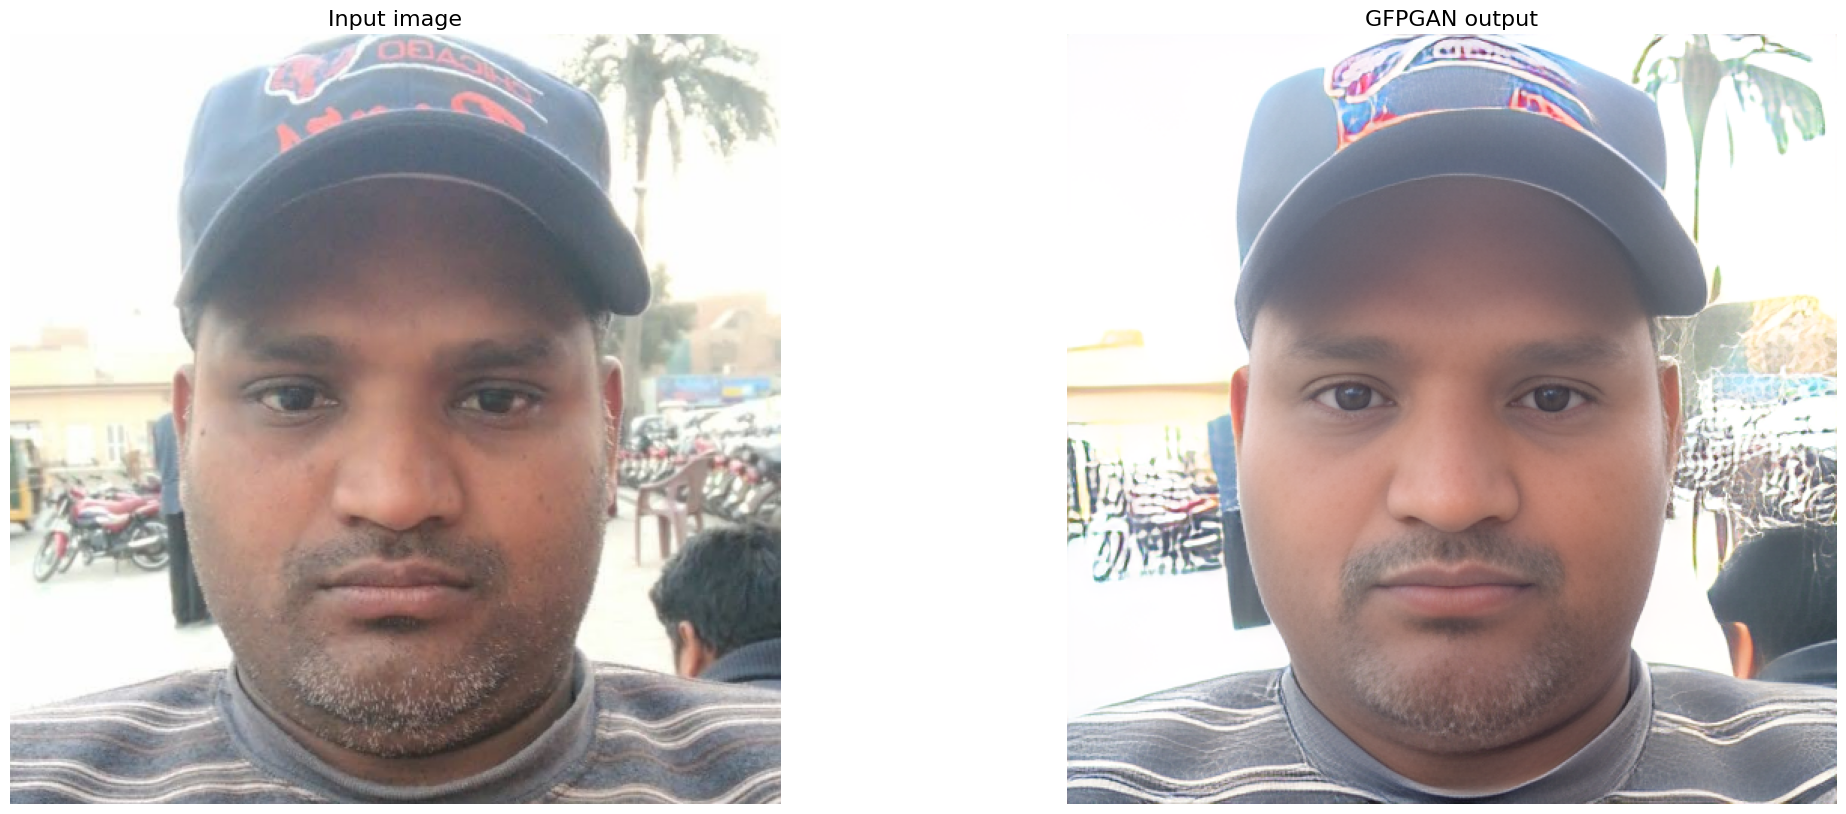

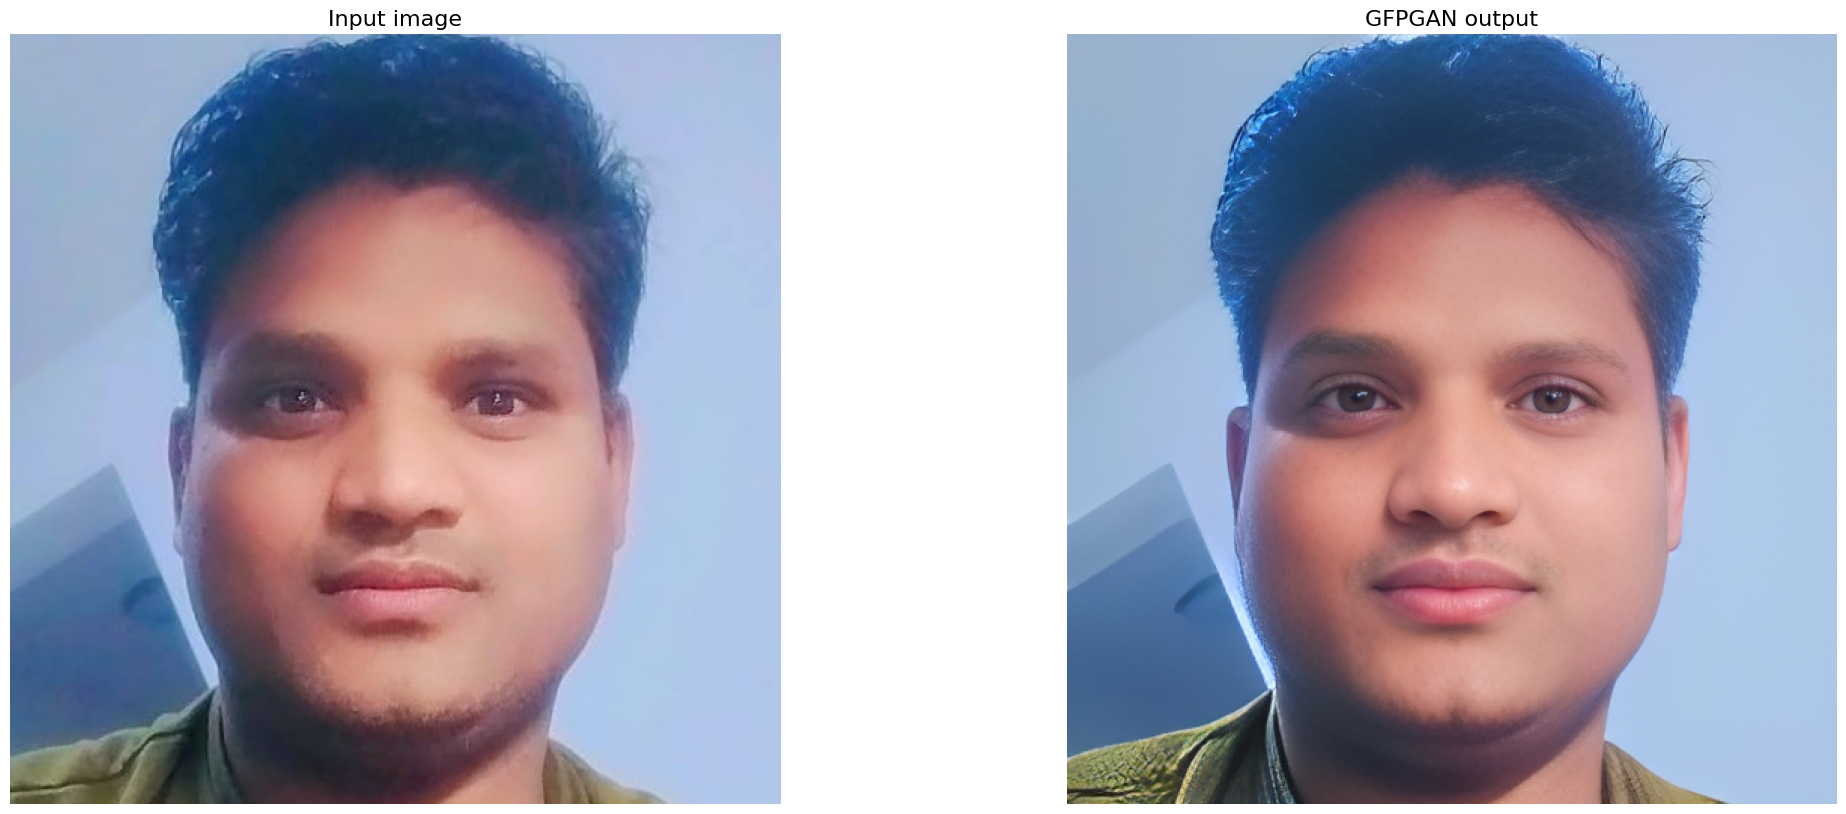

In [51]:
# We first visualize the cropped faces
# The left are the inputs images; the right are the results of GFPGAN

import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1)
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('GFPGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'results/cropped_faces'
result_folder = 'results/restored_faces'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)
plt.show()

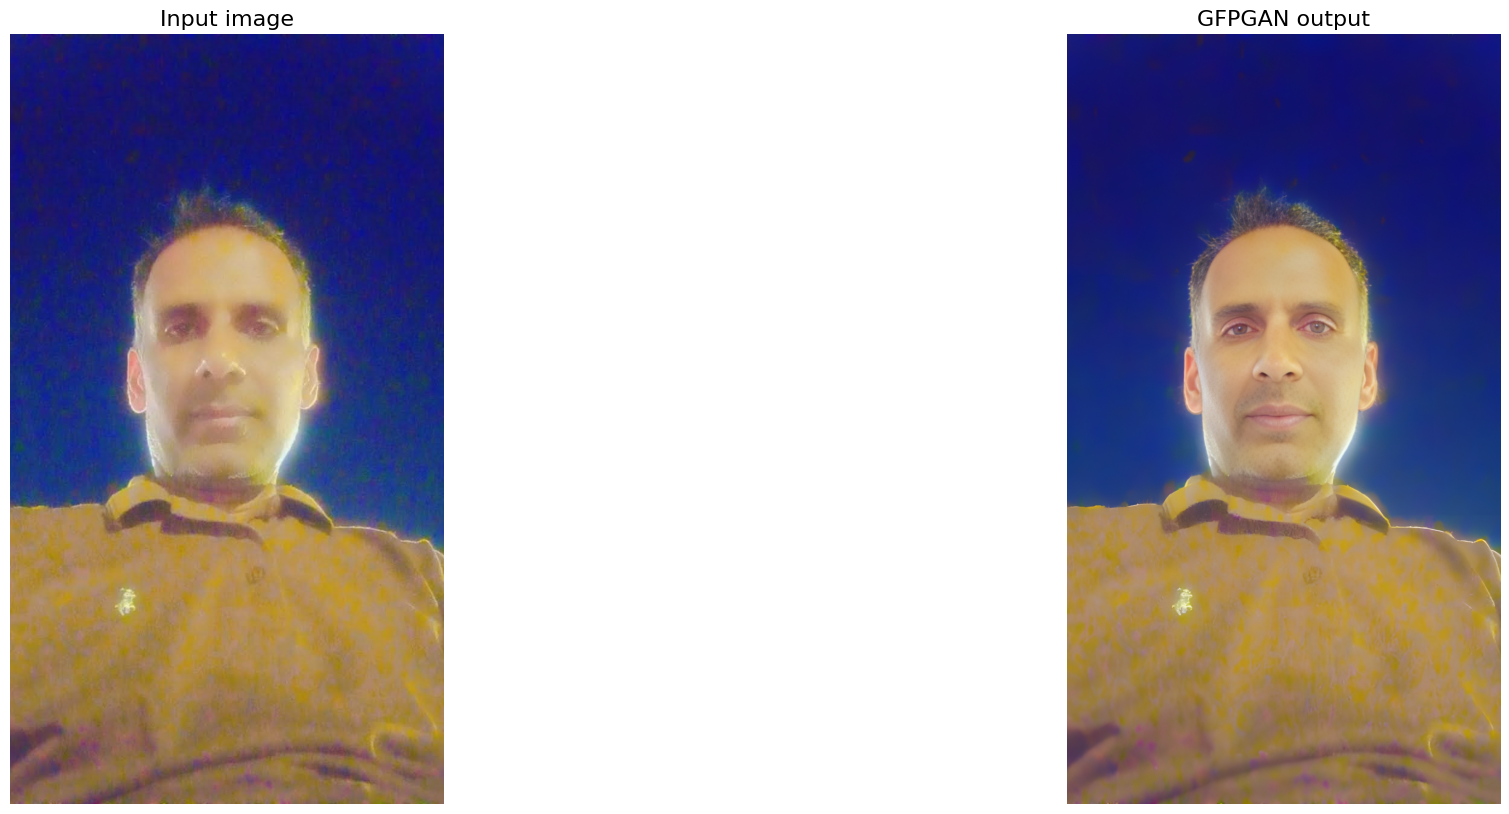

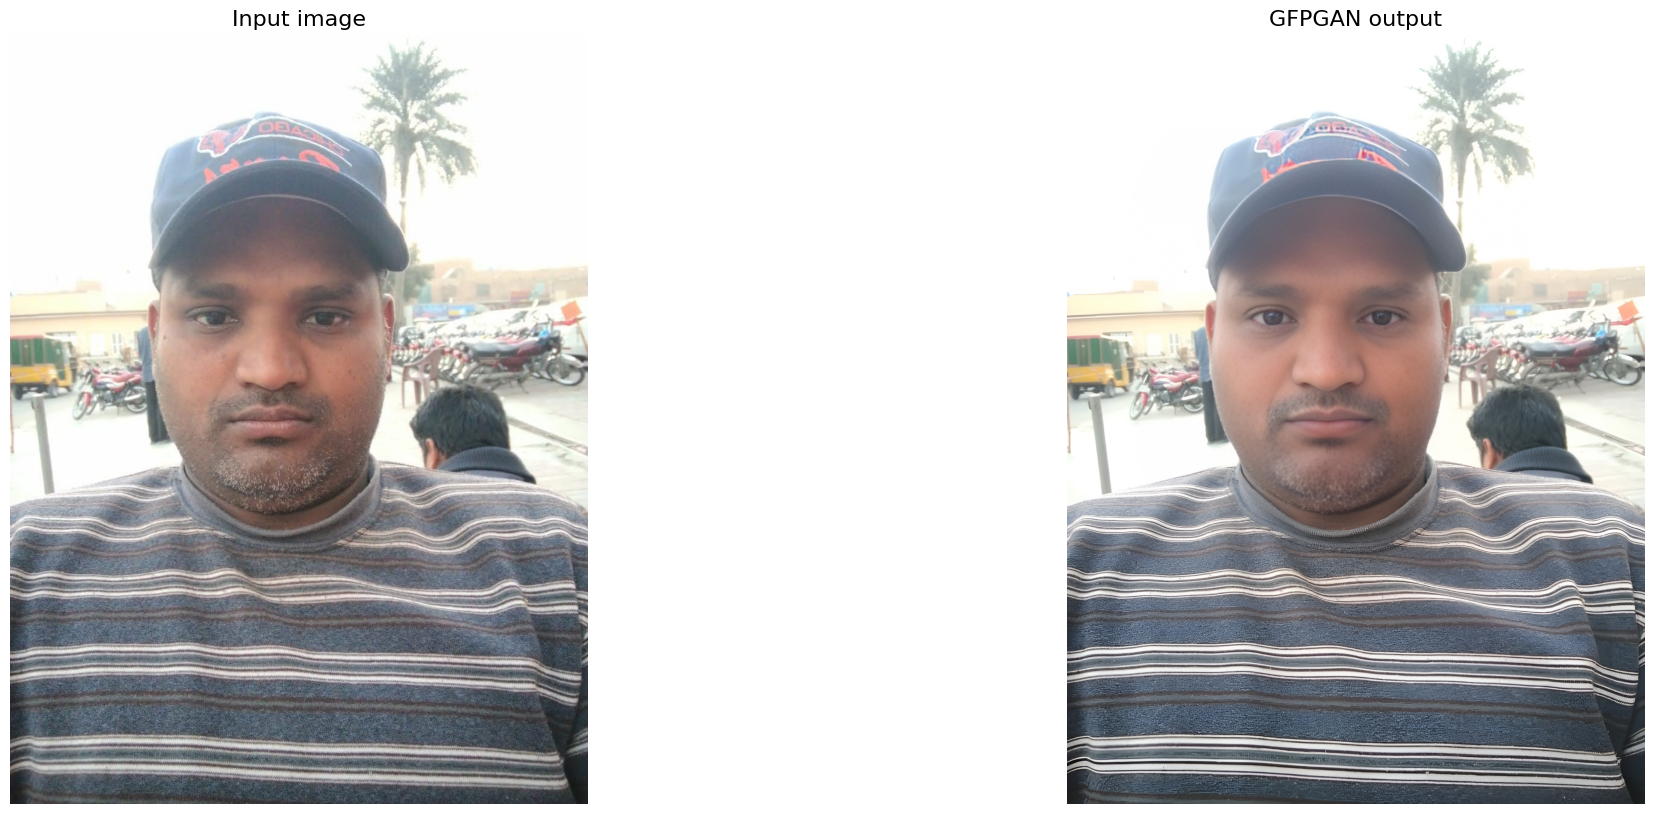

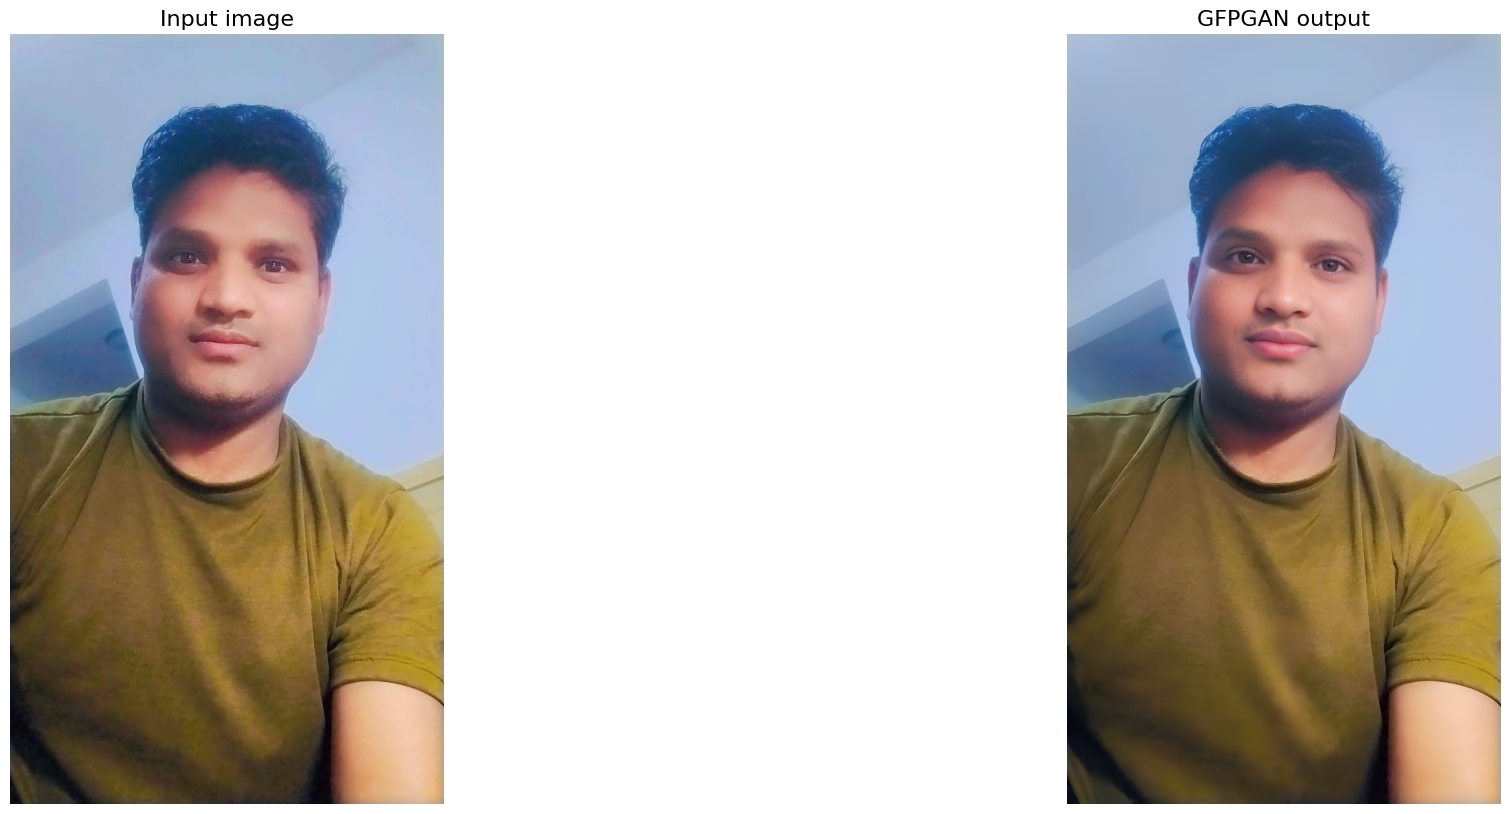

In [53]:
# We then visualize the whole image
# The left are the inputs images; the right are the results of GFPGAN

import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1)
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('GFPGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'inputs/upload'
result_folder = 'results/restored_imgs'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)
  plt.show()

##Evaluation Matrix using PSNR and SSIM

In [ ]:
def resize_image(image, target_shape):
    return cv2.resize(image, (target_shape[1], target_shape[0]))

def calculate_metrics(original, restored):
    # Resize the restored image to match the original's dimensions if necessary
    if original.shape != restored.shape:
        restored = resize_image(restored, original.shape)

    # Convert to grayscale if necessary for SSIM
    original_gray = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)
    restored_gray = cv2.cvtColor(restored, cv2.COLOR_RGB2GRAY)

    psnr_value = psnr(original_gray, restored_gray)
    ssim_value = ssim(original_gray, restored_gray)

    return psnr_value, ssim_value

# Example usage with img_input and img_output
psnr_value, ssim_value = calculate_metrics(img_input, img_output)
print(f'PSNR: {psnr_value}, SSIM: {ssim_value}')